# **Impact of Market News on Stock Price**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report  

## Pre-**processing** 

# **1. Importing Data**

In [2]:
news= pd.read_csv("Combined_News_DJIA.csv")

In [3]:
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
data = pd.read_csv("DJIA_table.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [6]:
data.sort_values(["Date"], axis=0, ascending=True, inplace=True) 

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


# **2. Feature Extraction and Selection**

In news and data dataframe, there is no redundant feature and all the features in the dataframe are required for analysis.

# 3. Removing NULL values

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.6+ KB


In [9]:
news.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [11]:
news.drop(['Top23','Top24','Top25'],axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 1988 to 0
Data columns (total 7 columns):
Date         1989 non-null object
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null int64
Adj Close    1989 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 124.3+ KB


In [13]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [14]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

There are no null values in stock data, but some of the news headlines are missing i.e., there are varying number of headlines but this will not affect our results so the values are not removed.

# **4. Scaling and Normaliztion**

we are not performing scaling and normalization

Here, only label in the news dataframe can take discrete values and is already well-shuffled and all other features in the data dataframe are continuous. Hence, no need for shuffling

## 5. Vectorizing news data and splitting the dataset for traing and testing

In [15]:
news_list = []
for row in range(0,len(news.index)): # CONVERT THE TRAINNG DATASET OF 27 COLUMNS INTO ONE ELEMENT IN THE LIST FOR EACH DAY
    news_list.append(' '.join(str(k) for k in news.iloc[row,2:27]))

In [16]:
news_list[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [17]:
print(len(news_list))

1989


In [18]:
news.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer()
tf=TfidfVectorizer(min_df=0.01, max_df=0.95,ngram_range=(2,2))
text_tf= tf.fit_transform(news_list)

In [20]:
text_tf

<1989x2906 sparse matrix of type '<class 'numpy.float64'>'
	with 143793 stored elements in Compressed Sparse Row format>

In [21]:
# train_news = news[news['Date'] < '2014-07-15']   # SPLITTING THE DATASET INTO TRAINING AND TESTING
# test_news = news[news['Date'] >= '2014-07-15']
from sklearn.model_selection import train_test_split
x_train_news, x_test_news, y_train_news, y_test_news = train_test_split(text_tf, news['Label'], test_size=0.3)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train_news, y_train_news)
news_predicted= clf.predict(x_test_news)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_news, news_predicted))

MultinomialNB Accuracy: 0.5393634840871022


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train_news, y_train_news)
news_predicted= clf.predict(x_test_news)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_news, news_predicted))

MultinomialNB Accuracy: 0.5393634840871022


## 6. Dividing data into Training and Testing

In [24]:
train_data = data[:1392]
test_data = data[1392:]

In [25]:
train_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [26]:
test_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
596,2014-02-20,16044.150391,16161.639648,16006.589844,16133.230469,77720000,16133.230469
595,2014-02-21,16135.919922,16191.919922,16093.799805,16103.299805,126580000,16103.299805
594,2014-02-24,16102.269531,16300.040039,16102.269531,16207.139648,244580000,16207.139648
593,2014-02-25,16207.339844,16254.259766,16147.250000,16179.660156,99470000,16179.660156
592,2014-02-26,16180.360352,16252.349609,16155.860352,16198.410156,93980000,16198.410156


## 7. Adding a feature in stock data depicting the trend on the basis of stock market

In [27]:
open_diff = data[1392:]
open_diff.drop
#subtracting close value of yesterday and today
open_diff= open_diff.set_index('Date').diff(periods=1)
# Remove unneeded features
open_diff = open_diff.drop(['High','Low','Close','Volume','Adj Close'], 1)
open_diff.head()

,Open
Date,
2014-02-20,NaN
2014-02-21,91.769531
2014-02-24,-33.650391
2014-02-25,105.070313
2014-02-26,-26.979492


In [28]:
open_diff = open_diff.shift(-1)
open_diff.head()

,Open
Date,
2014-02-20,91.769531
2014-02-21,-33.650391
2014-02-24,105.070313
2014-02-25,-26.979492
2014-02-26,17.339843


In [29]:
#if difference is negative then negative trend and if postive then positive trend
open_diff['Label'] = [1 if x > 0 else 0 for x in open_diff['Open']]     
open_diff.head()

,Open,Label
Date,,
2014-02-20,91.769531,1
2014-02-21,-33.650391,0
2014-02-24,105.070313,1
2014-02-25,-26.979492,0
2014-02-26,17.339843,1


In [30]:
open_diff.shape

(597, 2)

In [31]:
test_news = news[1392:]
test_news.set_index('Date',inplace=True)

In [32]:
open_diff["GivenLabel"] = test_news["Label"]   #adding news label for calculating the accuracy

In [33]:
open_diff.head()

,Open,Label,GivenLabel
Date,,,
2014-02-20,91.769531,1,1
2014-02-21,-33.650391,0,0
2014-02-24,105.070313,1,1
2014-02-25,-26.979492,0,0
2014-02-26,17.339843,1,1


# 8. Preparing Data for training

Setting Date as index in both train and test data

In [34]:
train_data.set_index('Date',inplace=True)

In [35]:
train_data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [36]:
train_news = news[:1392]
train_news.set_index('Date',inplace=True)


In [37]:
train_data['Label'] = train_news['Label']

C:\Users\apriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
train_data.head()

,Open,High,Low,Close,Volume,Adj Close,Label
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


In [39]:
train_news['Label'][:5]

Date
2008-08-08    0
2008-08-11    1
2008-08-12    0
2008-08-13    0
2008-08-14    1
Name: Label, dtype: int64

# **9. News Classification (Multinomial Naive Bayes)**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train_news, y_train_news)
news_predicted= clf.predict(x_test_news)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_news, news_predicted))

MultinomialNB Accuracy: 0.5393634840871022


In [41]:
news_predicted

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

# 10. Stock Price Prediction (Linear Regression)

In [42]:
train_data.head()

,Open,High,Low,Close,Volume,Adj Close,Label
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


In [43]:
train_open = train_data['Open']

In [44]:
train_open.head()

Date
2008-08-08    11432.089844
2008-08-11    11729.669922
2008-08-12    11781.700195
2008-08-13    11632.809570
2008-08-14    11532.070312
Name: Open, dtype: float64

In [45]:
train_data.drop('Open',axis=1,inplace=True)

C:\Users\apriy\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [46]:
train_data.head()

,High,Low,Close,Volume,Adj Close,Label
Date,,,,,,
2008-08-08,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
2008-08-11,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
2008-08-12,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
2008-08-13,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
2008-08-14,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


In [47]:
open_lr = LinearRegression(normalize=True)
open_lr.fit(train_data,train_open)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [48]:
test_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
596,2014-02-20,16044.150391,16161.639648,16006.589844,16133.230469,77720000,16133.230469
595,2014-02-21,16135.919922,16191.919922,16093.799805,16103.299805,126580000,16103.299805
594,2014-02-24,16102.269531,16300.040039,16102.269531,16207.139648,244580000,16207.139648
593,2014-02-25,16207.339844,16254.259766,16147.250000,16179.660156,99470000,16179.660156
592,2014-02-26,16180.360352,16252.349609,16155.860352,16198.410156,93980000,16198.410156


In [49]:
test_open=test_data['Open']

In [50]:
test_open.head()

596    16044.150391
595    16135.919922
594    16102.269531
593    16207.339844
592    16180.360352
Name: Open, dtype: float64

In [51]:
test_data.drop('Open',axis=1,inplace=True)

C:\Users\apriy\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
test_data.head()

,Date,High,Low,Close,Volume,Adj Close
596,2014-02-20,16161.639648,16006.589844,16133.230469,77720000,16133.230469
595,2014-02-21,16191.919922,16093.799805,16103.299805,126580000,16103.299805
594,2014-02-24,16300.040039,16102.269531,16207.139648,244580000,16207.139648
593,2014-02-25,16254.259766,16147.250000,16179.660156,99470000,16179.660156
592,2014-02-26,16252.349609,16155.860352,16198.410156,93980000,16198.410156


In [53]:
print(len(test_data))

597


In [54]:
test_data['Label'] = news_predicted

C:\Users\apriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
open_diff['News Predictions'] = news_predicted

In [56]:
test_data.head()

,Date,High,Low,Close,Volume,Adj Close,Label
596,2014-02-20,16161.639648,16006.589844,16133.230469,77720000,16133.230469,1
595,2014-02-21,16191.919922,16093.799805,16103.299805,126580000,16103.299805,1
594,2014-02-24,16300.040039,16102.269531,16207.139648,244580000,16207.139648,1
593,2014-02-25,16254.259766,16147.250000,16179.660156,99470000,16179.660156,1
592,2014-02-26,16252.349609,16155.860352,16198.410156,93980000,16198.410156,1


In [57]:
test_data.set_index('Date',inplace=True)

In [58]:
open_predict = open_lr.predict(test_data)

# 11. Accuracy and Mean Square Error

## **For Stock Price (Open)**

In [59]:
print(r2_score(test_open,open_predict))

0.9872537982186291


In [60]:
print(mean_squared_error(test_open, open_predict))

5367.292822192484



## For News (with given label)

In [61]:
import warnings; warnings.simplefilter('ignore')

In [62]:
x= open_diff['Label'].values.reshape(-1,1)
y = open_diff['News Predictions'].values.reshape(-1,1)
z = test_news['Label'].values.reshape(-1,1)

In [63]:
#Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, z,y, scoring=scoring)
print("Accuracy: %.3f (%.3f)" %(results.mean(), results.std()))

Accuracy: 0.693 (0.000)


In [64]:
#confusion matrix
matrix = confusion_matrix(z,y)
print(matrix)
RightPredictions = matrix[0][0] + matrix[1][1]
WrongPredictions = matrix[0][1] + matrix[1][0]
print("Right Predictions : ")
print(RightPredictions);
print("Wrong Predictions : ") 
print(WrongPredictions);

[[ 72 208]
 [111 206]]
Right Predictions : 
278
Wrong Predictions : 
319


In [65]:
#classification report
print(classification_report(z, y))

             precision    recall  f1-score   support

          0       0.39      0.26      0.31       280
          1       0.50      0.65      0.56       317

avg / total       0.45      0.47      0.45       597



## For news (with our label generated from stock price **open**)

In [66]:
#Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, x,y, scoring=scoring)
print("Accuracy: %.3f (%.3f)" %(results.mean(), results.std()))

Accuracy: 0.693 (0.000)


In [67]:
#area under ROC curve
scoring = 'roc_auc'
results = model_selection.cross_val_score(clf, x,y, scoring=scoring)
print("AUC: %.3f (%.3f)" %(results.mean(), results.std()))

AUC: 0.500 (0.000)


In [68]:
#confusion matrix
matrix = confusion_matrix(x,y)
print(matrix)
RightPredictions = matrix[0][0] + matrix[1][1]
WrongPredictions = matrix[0][1] + matrix[1][0]
print("Right Predictions : ")
print(RightPredictions);
print("Wrong Predictions : ") 
print(WrongPredictions);

[[ 71 207]
 [112 207]]
Right Predictions : 
278
Wrong Predictions : 
319


In [69]:
#classification report
print(classification_report(x, y))

             precision    recall  f1-score   support

          0       0.39      0.26      0.31       278
          1       0.50      0.65      0.56       319

avg / total       0.45      0.47      0.45       597



# 12. Visualiztion

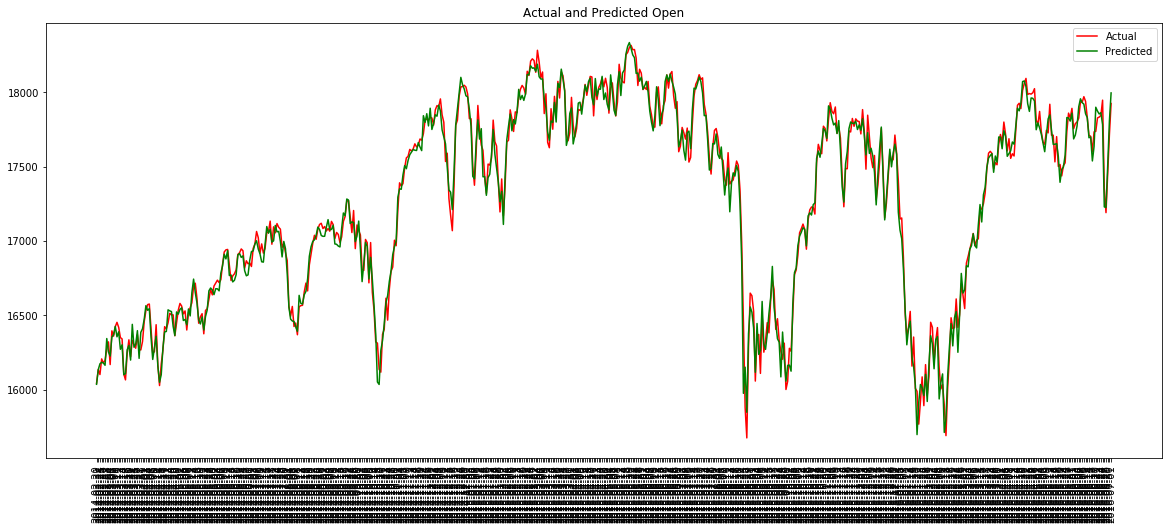

In [70]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(test_data.index,test_open,color="red",label="Actual")
plt.plot(test_data.index,open_predict,color="green",label="Predicted")
plt.title("Actual and Predicted Open")
plt.legend()

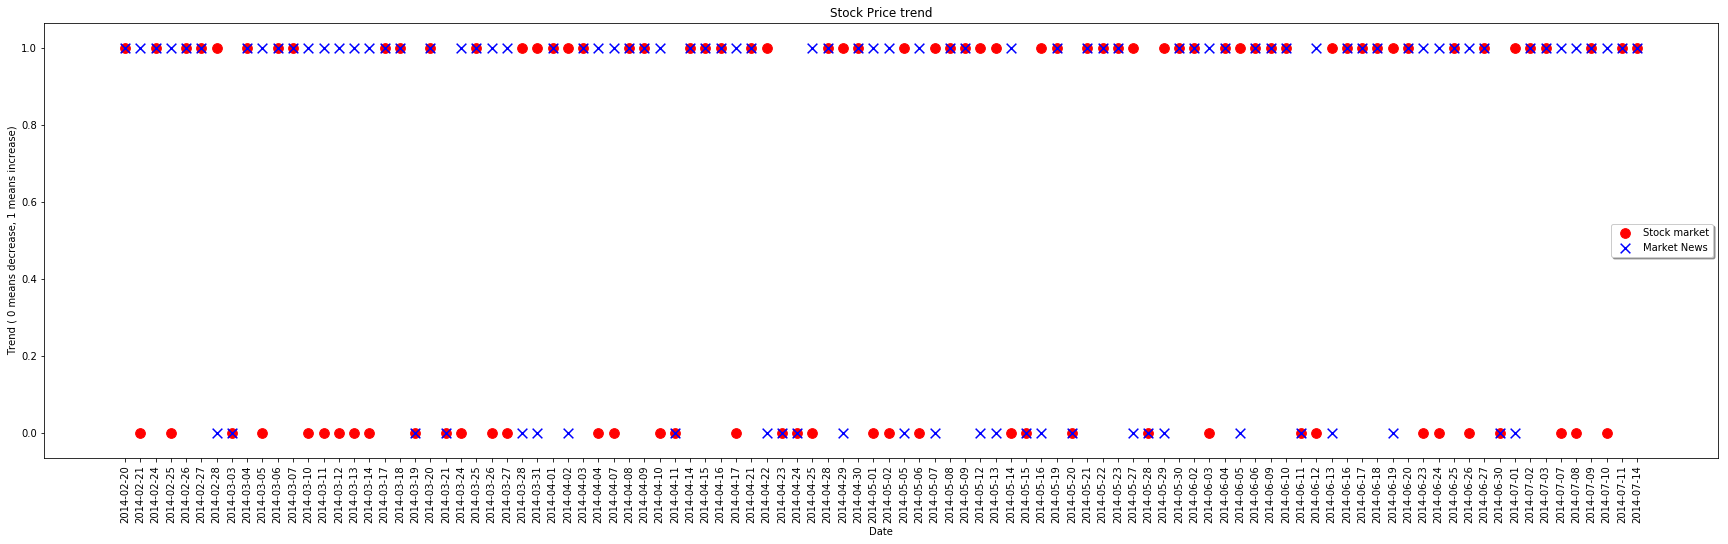

In [71]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
colors = (0,0,0)
area = np.pi*30

# Plot
ax1 = plt.scatter(open_diff.index[:100], open_diff['Label'][:100], s=area, c="red", alpha=1)
ax2 = plt.scatter(open_diff.index[:100], open_diff['News Predictions'][:100], s=area, c="blue", alpha=1,marker='x')
plt.title('Stock Price trend')
plt.xlabel('Date')
plt.ylabel('Trend ( 0 means decrease, 1 means increase)')

plt.legend((ax1,ax2),
           ('Stock market', 'Market News'),
           scatterpoints=1,
           loc='center right',shadow=True)
plt.show()

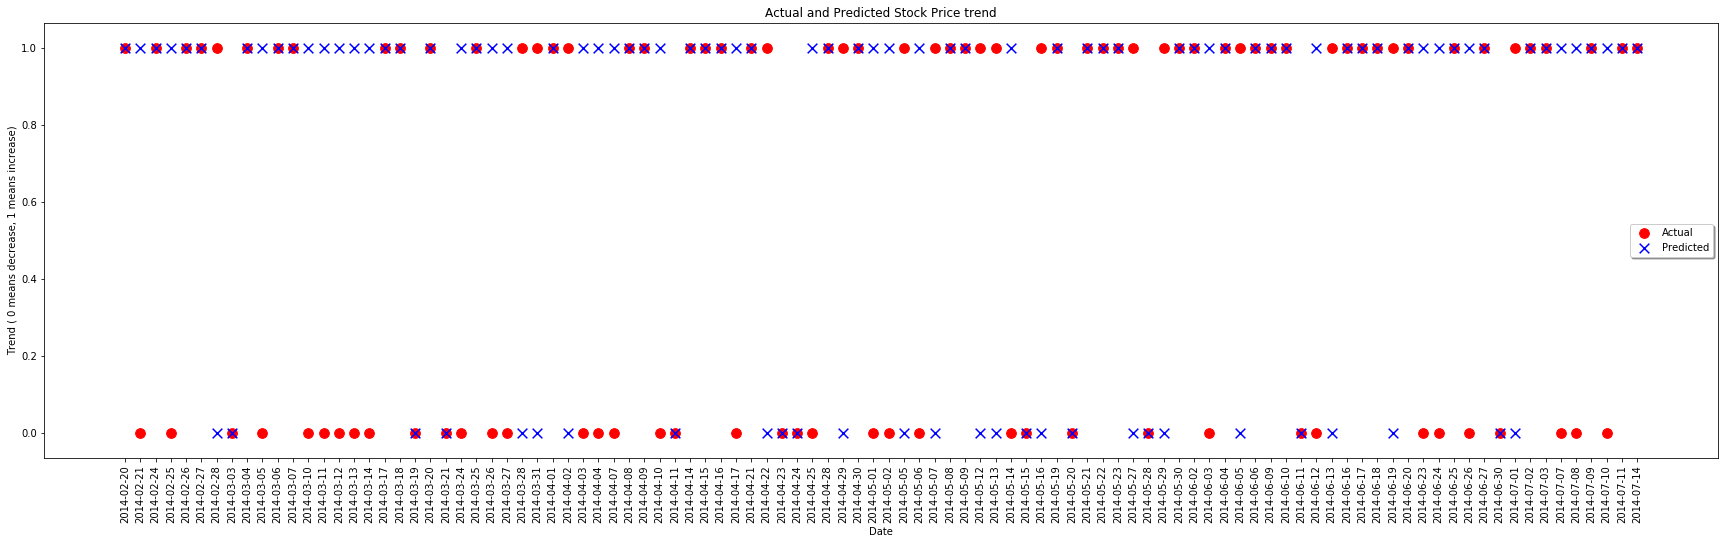

In [72]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
colors = (0,0,0)
area = np.pi*30

# Plot
ax1 = plt.scatter(test_news.index[:100], test_news['Label'][:100], s=area, c="red", alpha=1)
ax2 = plt.scatter(open_diff.index[:100], open_diff['News Predictions'][:100], s=area, c="blue", alpha=1,marker='x')
plt.title('Actual and Predicted Stock Price trend')
plt.xlabel('Date')
plt.ylabel('Trend ( 0 means decrease, 1 means increase)')

plt.legend((ax1,ax2),
           ('Actual', 'Predicted'),
           scatterpoints=1,
           loc='center right',shadow=True)
plt.show()